In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [3]:
train =pd.read_csv("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Support Vector machines/SalaryData_Train.csv")
test =pd.read_csv("C:/Users/User/Excelerclasses_python/python_statistics_excersise/Support Vector machines/SalaryData_Test.csv")

# Dropping Duplicates

In [4]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [5]:
train.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
test.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


# EDA

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26903 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            26903 non-null  int64 
 1   workclass      26903 non-null  object
 2   education      26903 non-null  object
 3   educationno    26903 non-null  int64 
 4   maritalstatus  26903 non-null  object
 5   occupation     26903 non-null  object
 6   relationship   26903 non-null  object
 7   race           26903 non-null  object
 8   sex            26903 non-null  object
 9   capitalgain    26903 non-null  int64 
 10  capitalloss    26903 non-null  int64 
 11  hoursperweek   26903 non-null  int64 
 12  native         26903 non-null  object
 13  Salary         26903 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.1+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14130 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            14130 non-null  int64 
 1   workclass      14130 non-null  object
 2   education      14130 non-null  object
 3   educationno    14130 non-null  int64 
 4   maritalstatus  14130 non-null  object
 5   occupation     14130 non-null  object
 6   relationship   14130 non-null  object
 7   race           14130 non-null  object
 8   sex            14130 non-null  object
 9   capitalgain    14130 non-null  int64 
 10  capitalloss    14130 non-null  int64 
 11  hoursperweek   14130 non-null  int64 
 12  native         14130 non-null  object
 13  Salary         14130 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


# Data Describe

In [9]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,26903.000000,26903.000000,26903.000000,26903.000000,26903.000000
mean,39.049140,10.144296,1215.443259,98.427499,41.164591
std,13.188825,2.620154,7805.366384,425.493211,12.347051
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,1185.899292,94.499646,41.073885
std,13.429544,2.602557,7903.191981,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


# Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

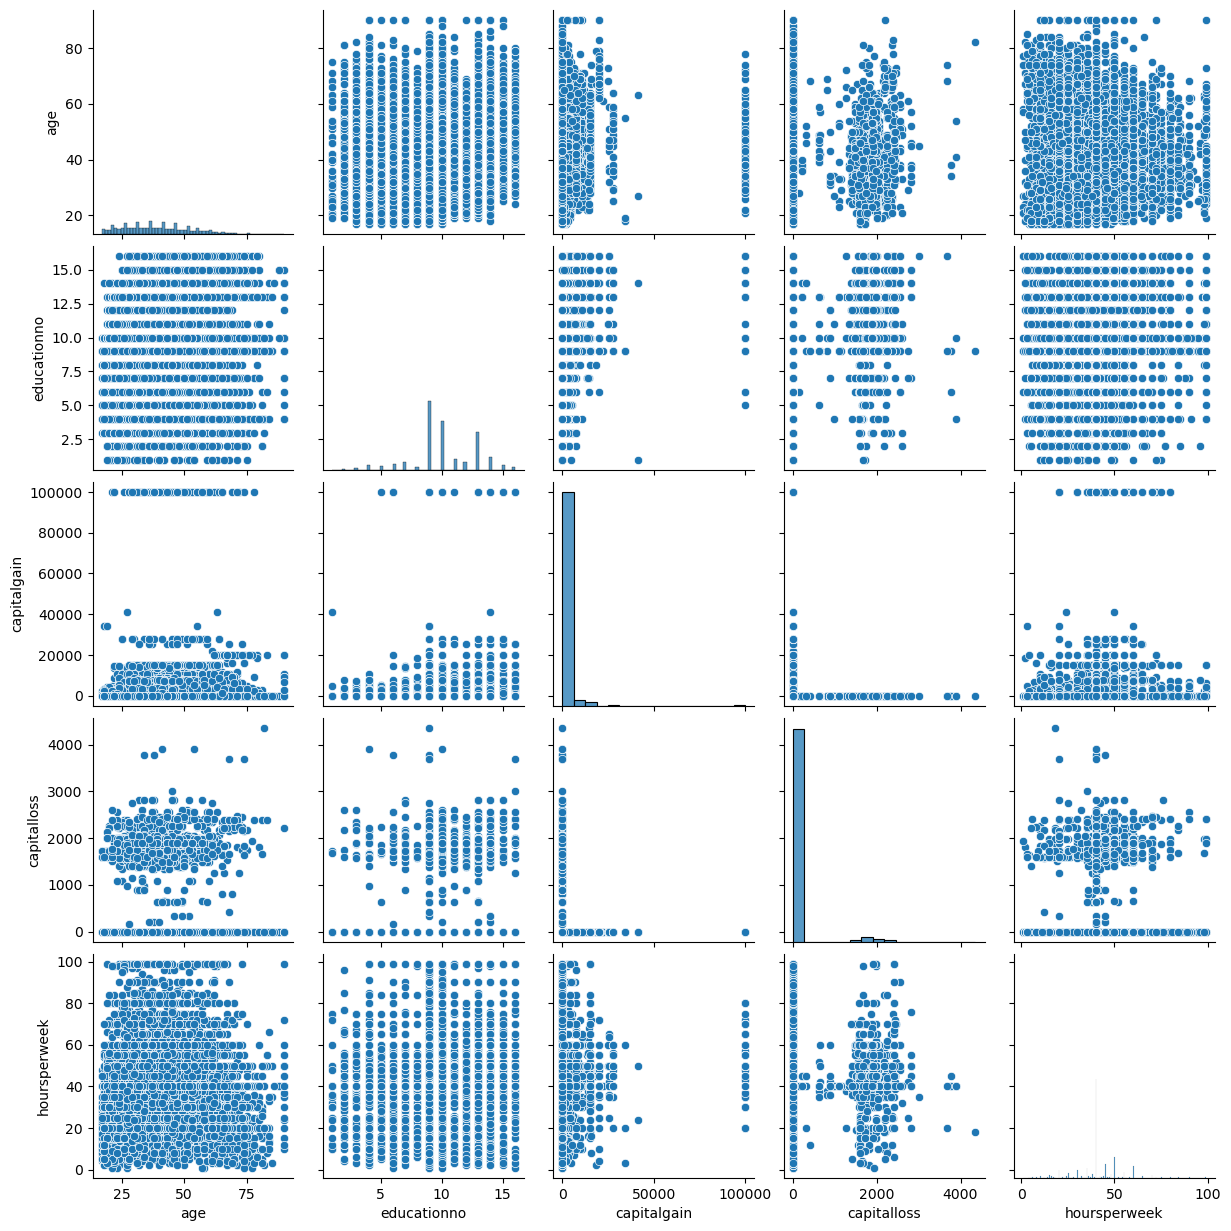

In [11]:
plt.figure(figsize=(12,8))
sns.pairplot(train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x800 with 0 Axes>

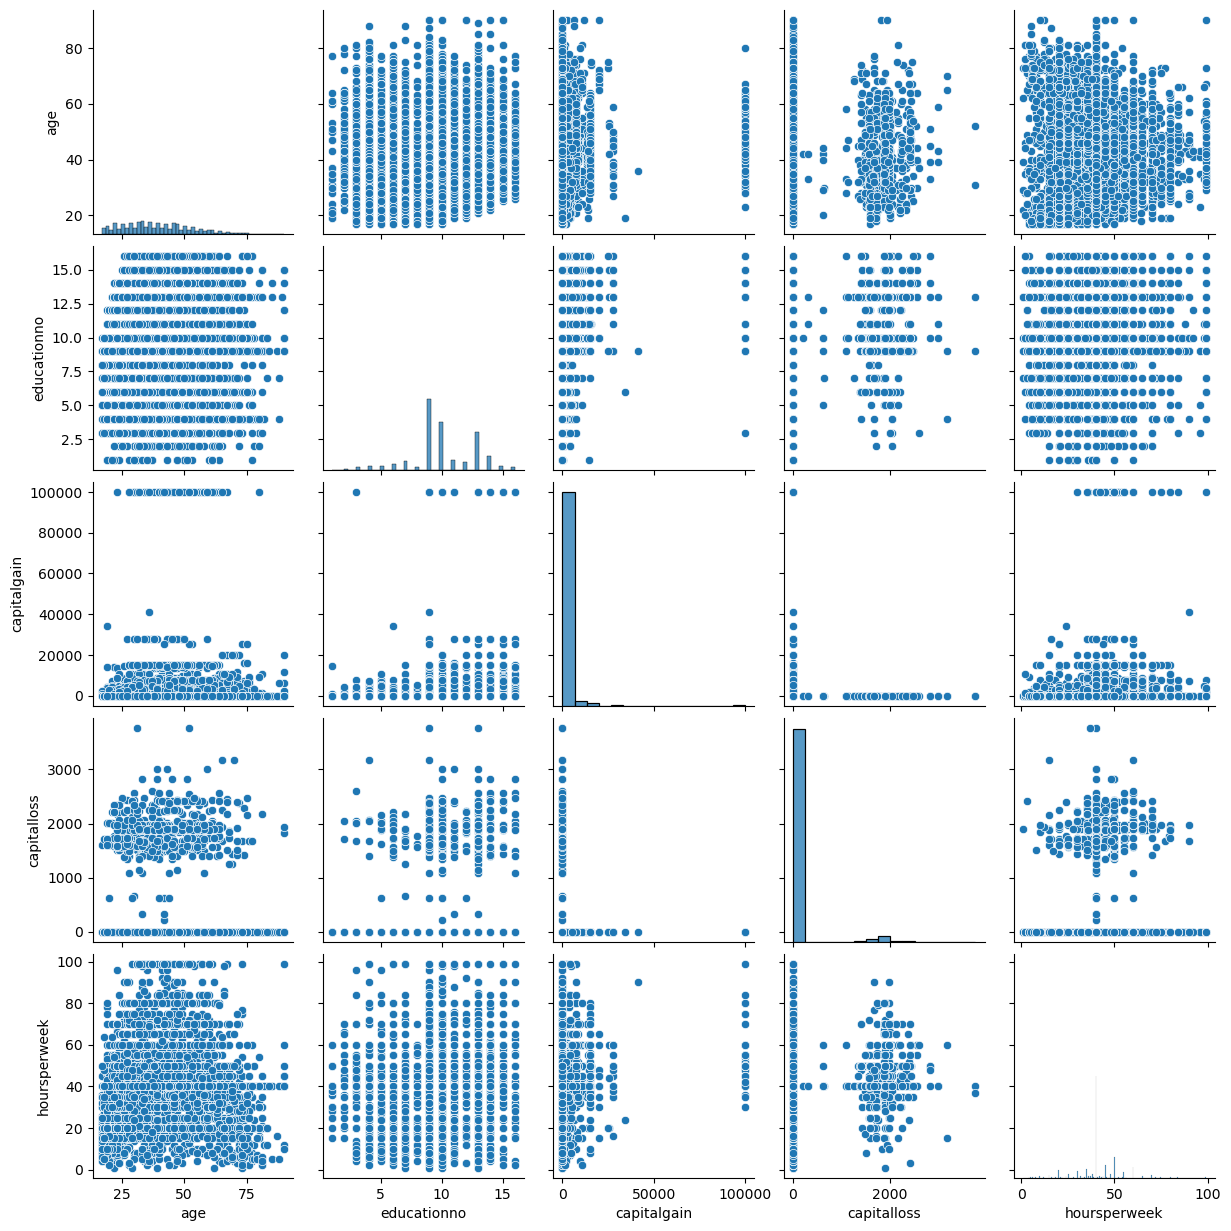

In [12]:
plt.figure(figsize=(12,8))
sns.pairplot(test)
plt.show

<AxesSubplot:xlabel='workclass'>

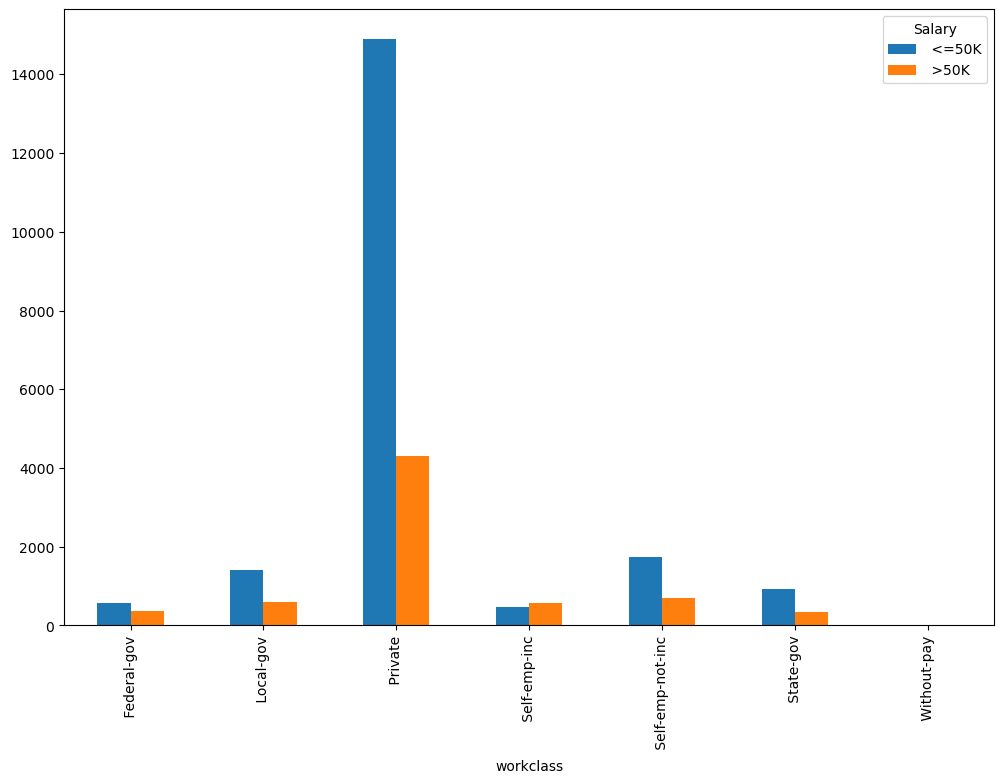

In [13]:
pd.crosstab(train.workclass,train.Salary).plot(kind="bar",figsize=(12,8))

<AxesSubplot:xlabel='sex'>

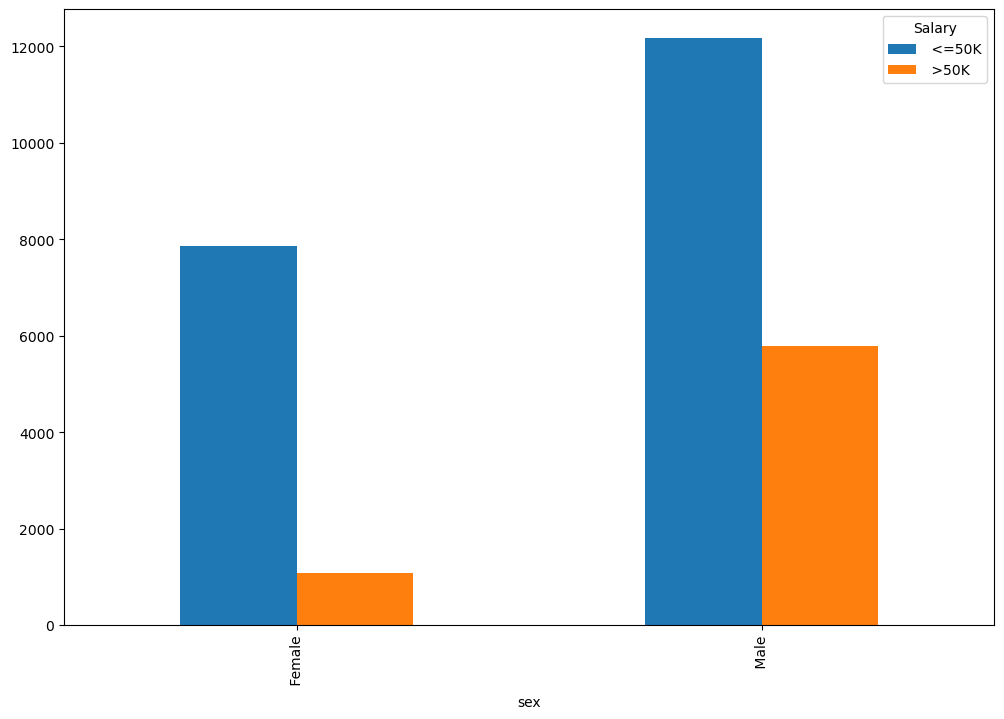

In [14]:
pd.crosstab(train.sex,train.Salary).plot(kind="bar",figsize=(12,8))

<AxesSubplot:xlabel='race', ylabel='count'>

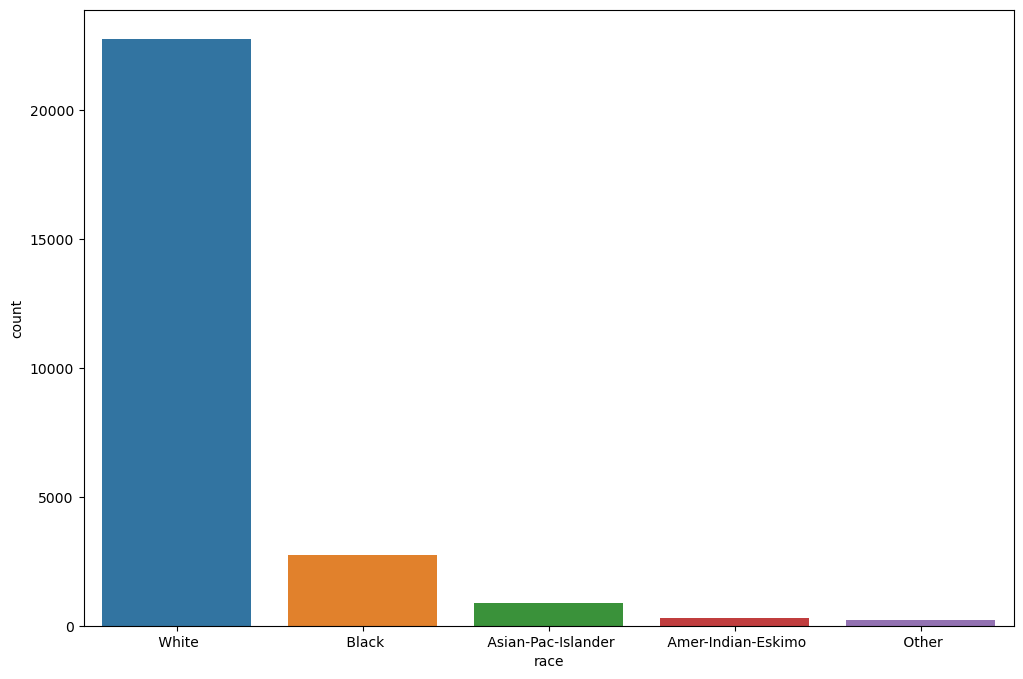

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x='race',data=train)

# Box plot

<AxesSubplot:>

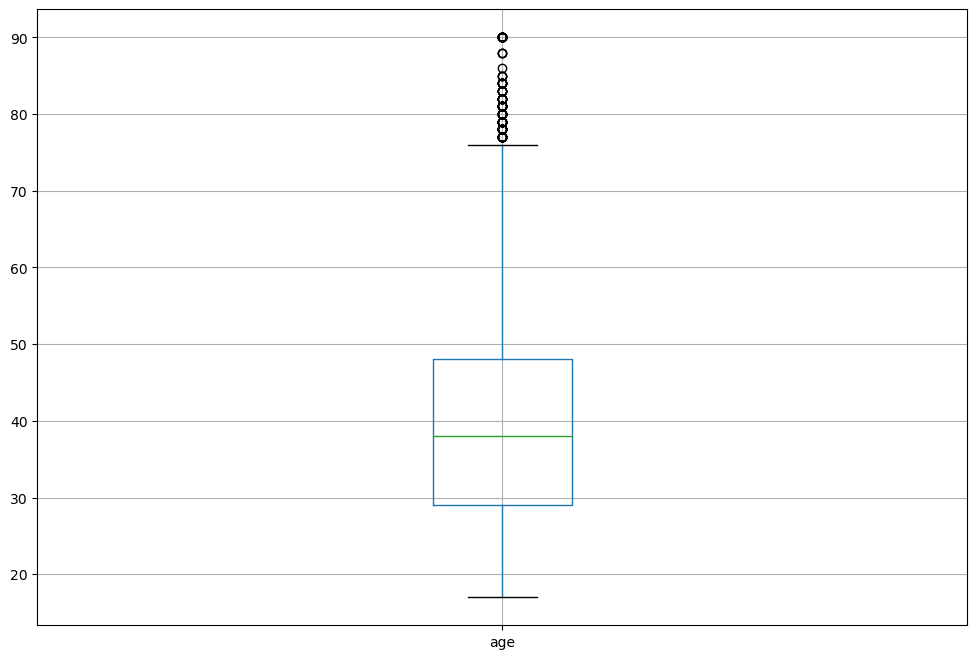

In [16]:
plt.figure(figsize=(12,8))
train.boxplot(column=['age'])

In [17]:
columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

# Consider all the above columns for encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
num = LabelEncoder()
for i in columns:
    train[i] = num.fit_transform(train[i])
    test[i] = num.fit_transform(test[i])

# Finding the high correlated Values by using HeatMap

<AxesSubplot:>

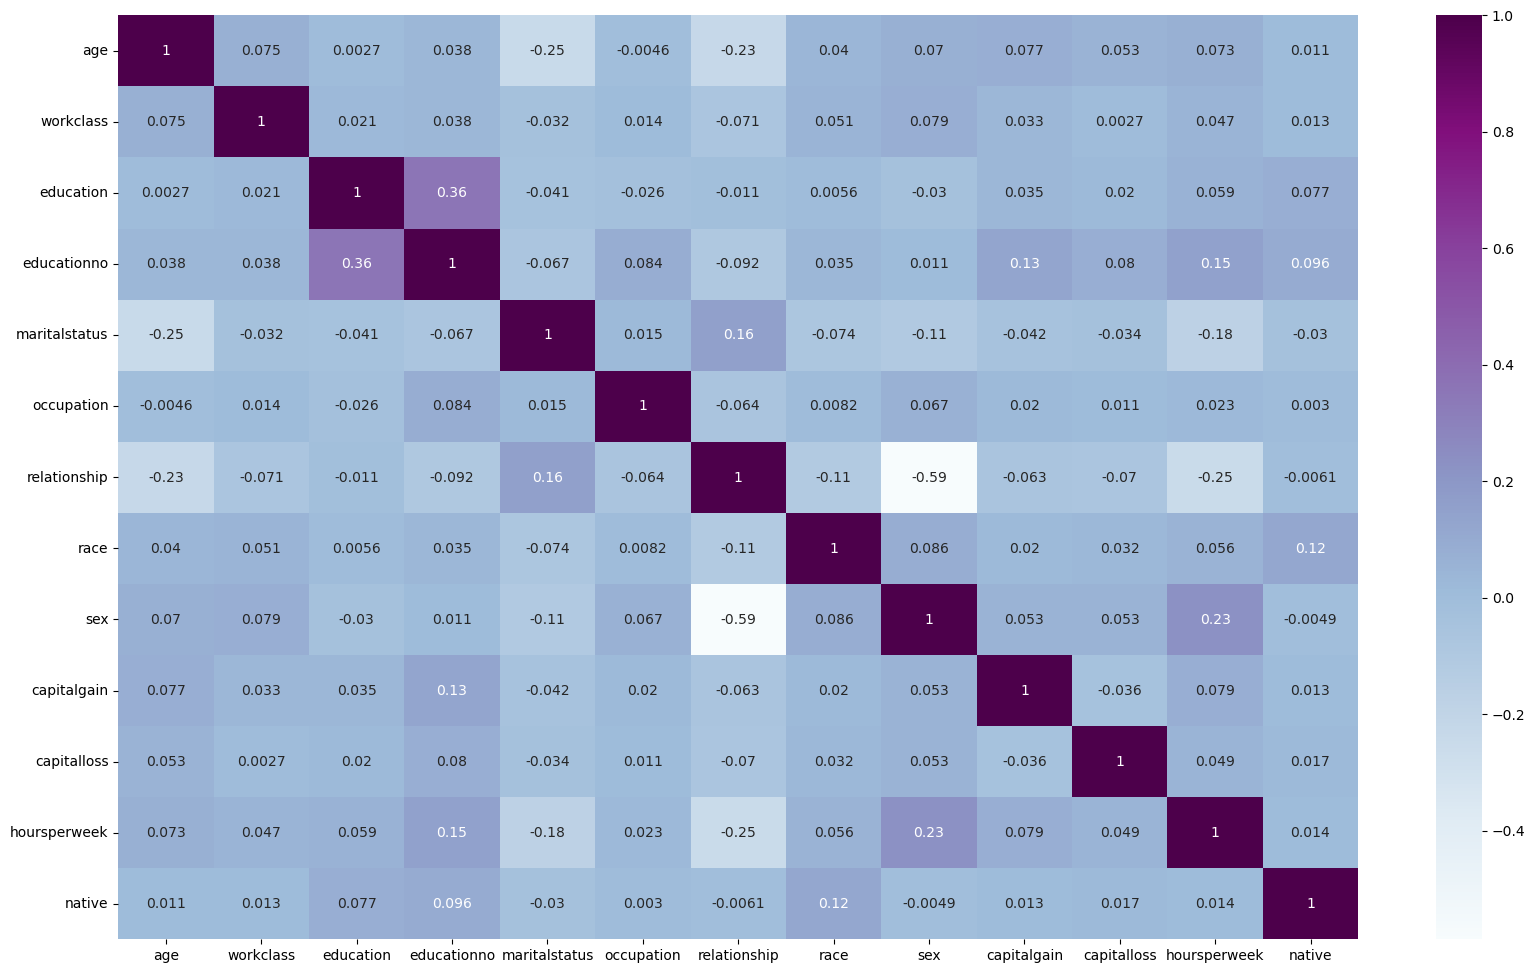

In [19]:
plt.figure(figsize=(20,12))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap= "BuPu")

There is no high Correlation value found.

In [20]:
#Dividing the data into dependent and independent
X_train = train.iloc[:,0:13]
Y_train = train.iloc[:,13]

X_test = test.iloc[:,0:13]
Y_test = test.iloc[:,13]

# Removing scaling effect

In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
X_train = norm_func(X_train)
X_test =  norm_func(X_test)

In [22]:
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564


In [23]:
X_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.948718


In [25]:
from sklearn.metrics import accuracy_score
clf = SVC(C= 15, gamma = 50)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred)* 100
print("Accuracy =", acc)

Accuracy = 80.2406227883935


# Radical Support Vector Machine

In [26]:
svc_radical= svm.SVC(kernel='rbf')
svc_radical.fit(X_train, Y_train.values.ravel())
score_svc_radical= svc_radical.score(X_test,Y_test)*100
print('The Accuracy of Radical SVC is', score_svc_radical)

The Accuracy of Radical SVC is 84.10474168435952


# Linear Support Vector Machine

In [27]:
svc=SVC (gamma=0.22)
svc.fit(X_train, Y_train)
score_svc=svc.score(X_test, Y_test)*100
print('The Accuracy of SVC score is', score_svc)

The Accuracy of SVC score is 83.26963906581742


# SVM using polynominal kernel

In [28]:
svc_radical= svm.SVC(kernel='poly',C=1,gamma=0.22)
svc_radical.fit(X_train, Y_train.values.ravel())
score_svc_radical= svc_radical.score(X_test,Y_test)*100
print('The Accuracy of poly SVC is', score_svc_radical)

The Accuracy of poly SVC is 83.47487615003539


In [29]:
data = {"MODEL":pd.Series(["kernel_rbf","linear","kernel_polynominal"]),"Values":pd.Series([print('The Accuracy of Radical SVC is', score_svc_radical),
                print('The Accuracy of SVC score is', score_svc),print('The Accuracy of poly SVC is', score_svc_radical)])}

The Accuracy of Radical SVC is 83.47487615003539
The Accuracy of SVC score is 83.26963906581742
The Accuracy of poly SVC is 83.47487615003539


# Radical Support Vector Machine is giving best accuracy of 84.10%